In [1]:
import tensorflow as tf
%matplotlib inline
import numpy as np # linear algebra
import seaborn as sns #statistical data visualization
sns.set(style='whitegrid')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
Iris=pd.read_csv(r"C:\Users\svkar\Desktop\python workspace\iris1.csv")
Iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
Iris.shape

(150, 5)

In [4]:
Iris=Iris[0:100]
Iris.shape


(100, 5)

In [5]:
'''Step 2: Numerical processing
replace 'Iris-setosa' as 0
replace 'Iris-versicolor' as 1'''
Iris=Iris.replace({'species':{'setosa':0,'versicolor':1}})

In [6]:
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


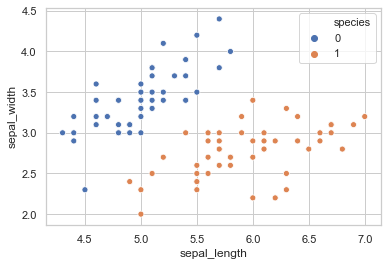

In [7]:
sns.scatterplot(x='sepal_length',y='sepal_width',data=Iris,hue='species')
plt.legend(loc='best')

In [8]:
X = Iris.drop(labels=['species'], axis=1).values #feature matrix
Y = Iris.species.values #output

In [17]:
X = Iris.drop(labels=['species'], axis=1).values
Y = Iris.species.values

In [18]:
train_index=np.random.choice(len(X),80)
test_index = np.array(list(set(range(len(X))) - set(train_index)))
test_index = np.array(list(set(range(len(X))) - set(train_index)))

In [19]:
train_X = X[train_index]
train_y = Y[train_index]
test_X = X[test_index]
test_y = Y[test_index]

In [21]:
from sklearn.preprocessing import MinMaxScaler
mima = MinMaxScaler()
train_X=mima.fit_transform(train_X)
train_y=mima.fit_transform(train_y.reshape(-1, 1))

In [22]:
#declaring variables
W=tf.Variable(tf.random_normal(shape=[4,1]))
b=tf.Variable(tf.random_normal(shape=[1,1]))


In [23]:
#constructor for random initialization
init=tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [24]:
# Define placeholders
data = tf.placeholder(dtype=tf.float32, shape=[None, 4])
#comment on the difference between tf.placeholder and tf.variable-----variables are used to hold the weights and biases whereas placeholder are used to holdsomething in place of them(usually feed data)
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [25]:
# Declare the 'model' you need to learn
Y_model = tf.nn.sigmoid(tf.add(tf.matmul(data, W), b)) 

In [26]:
# Declare loss function
cost = tf.nn.sigmoid_cross_entropy_with_logits(logits = Y_model, labels =target) 
# Use the sigmoid cross-entropy loss function,
loss = tf.reduce_mean(cost)
# first doing a sigmoid on the model result and then using the cross-entropy loss function


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [48]:
# Define the learning rate， batch_size and number of iterations.
learning_rate=0.005
epochs=1000
batch_size=len(train_X)

#gradient_descent

opt=tf.train.GradientDescentOptimizer(learning_rate)
goal= opt.minimize(loss)

In [49]:
# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(Y_model)
# Bool into float32 type
correct = tf.cast(tf.equal(prediction,target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework

In [50]:
# Start training model
# Define the variable that stores the result
loss_trace = []
train_accuracy = []


In [51]:
for epoch in range(epochs):
    # Generate random batch_index
    batch_index=np.random.choice(len(train_X),30)#randomnly picks up up 30 sample data from the train_X
    batch_train_X = train_X[batch_index]
    batch_train_y = np.matrix(train_y[batch_index])
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_acc= sess.run(accuracy, feed_dict={data: batch_train_X, target: batch_train_y})
    
    loss_trace.append(np.sum(temp_loss))
    train_accuracy.append(np.sum(temp_acc))
    
    if (epoch + 1) % 100 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f}'.format(epoch + 1, temp_loss,
                                                                          temp_acc))
#Write the command to calculate test accuracy:

epoch:  100 loss: 0.693265 train_acc: 0.366667
epoch:  200 loss: 0.694386 train_acc: 0.400000
epoch:  300 loss: 0.696820 train_acc: 0.566667
epoch:  400 loss: 0.695216 train_acc: 0.500000
epoch:  500 loss: 0.695048 train_acc: 0.533333
epoch:  600 loss: 0.694632 train_acc: 0.433333
epoch:  700 loss: 0.696951 train_acc: 0.600000
epoch:  800 loss: 0.692224 train_acc: 0.300000
epoch:  900 loss: 0.695982 train_acc: 0.566667
epoch: 1000 loss: 0.694857 train_acc: 0.500000


In [52]:
   len(loss_trace)

1000

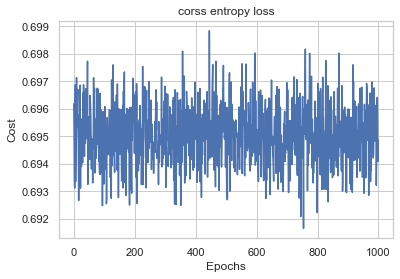

In [53]:
plt.plot(list(range(epochs)),loss_trace) 
plt.xlabel('Epochs') 
plt.ylabel('Cost') 
plt.title('corss entropy loss') 
  
plt.show()


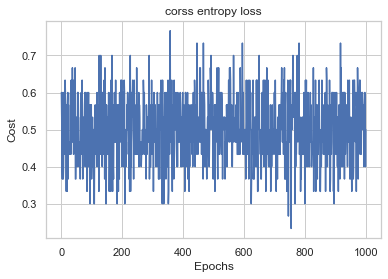

In [54]:
plt.plot(list(range(epochs)),train_accuracy) 
plt.xlabel('Epochs') 
plt.ylabel('Cost') 
plt.title('corss entropy loss') 
  
plt.show()